# Regular wall od edge dislocations

## Define geometry

Choose an imaged reflection, surface normal and orientation of the dislocation wall

In [1]:
### Do geometry calculation
import numpy as np
lmbd = 12.398 / 17.00 * 1e-7 #wavelength in 
latt_param = 4.0478e-7 # Cubic!
hkl = np.array([-1 ,1 ,-1])

#################### CALCULATE CRYSTAL BASIS #######################
# Crystal reference frame vectors in the crystal lattice basis
z = hkl / np.linalg.norm(hkl) # this is the scattering vector
x = np.array([1, 0, -1])/np.sqrt(2) # This is the surface of the crystal. ###!!! YOU AHVE TO PICK THIS NORMAL TO Q AT THE MOMENT!!!###
# y = np.array([-1, -1, 1])/np.sqrt(3) # This one comes for free
y = -np.cross(x, z)


# Dislocation coordinate system in the crystal lattice basis
b = np.array([1, -1, 0])/np.sqrt(2)
n = np.array([1, 1, -1])/np.sqrt(3)
t = np.array([1, 1, 2])/np.sqrt(6)
print(n)
print(-np.cross(b,t))
disloc_to_latt = np.array([b, n, t]).transpose()
latt_to_disloc = disloc_to_latt.T
#diloc_to_latt = np.identity(3)

# Calculate a number of rotation matrices 
ref_to_latt  = np.array([x, y, z]).transpose()
latt_to_ref = ref_to_latt.T


A = np.eye(3)*latt_param
B = 2*np.pi*np.linalg.inv(A).T
Q = np.dot(B, hkl)
theta = np.arcsin(np.linalg.norm(Q)/4/np.pi*lmbd)      # internally we keep angles in rad, 


ref_to_lab = np.array([[np.cos(theta), 0, -np.sin(theta)],[0, 1, 0],[np.sin(theta), 0, np.cos(theta)]])



U = ref_to_lab @ latt_to_ref
AU = latt_param * U
BU = 2*np.pi*np.linalg.inv(AU).T


lab_to_latt = U.T
lab_to_disloc = latt_to_disloc @ lab_to_latt  
disloc_to_lab = lab_to_disloc.T

#print(disloc_to_lab)

###### Calculate Scattering angle and wavevectors in crystal reference frame ########
# Simulations uses different ordering of the x-y-z that the geometry calculation here

sim_to_ref = np.array([[0,0,1],[0,-1,0],[1,0,0]] )
ref_to_sim = sim_to_ref.T
U_sim = ref_to_sim @ latt_to_ref





R_disloc_sim = U_sim @ disloc_to_latt
print(R_disloc_sim)

UA_sim = U_sim @ A

print(f'2θ = {2*theta*180/np.pi:.3f}°')  # but always print in degrees, please
k_0_ref = np.array([-np.sin(theta), 0, np.cos(theta) ])*2*np.pi/lmbd
print(f'k0 = ({k_0_ref[0]*1e-6:.2f}, {k_0_ref[1]*1e-6:.2f}, {k_0_ref[2]*1e-6:.2f}) 1/nm')
Q = 2*np.pi*np.linalg.inv(UA_sim).T @ hkl
print(f'Q = ({Q[0]*1e-6:.2f}, {Q[1]*1e-6:.2f}, {Q[2]*1e-6:.2f}) 1/nm')




[ 0.57735027  0.57735027 -0.57735027]
[ 0.57735027  0.57735027 -0.57735027]
[[-0.81649658  0.33333333 -0.47140452]
 [-0.28867513  0.47140452  0.83333333]
 [ 0.5         0.81649658 -0.28867513]]
2θ = 17.953°
k0 = (-13.44, 0.00, 85.10) 1/nm
Q = (26.89, 0.00, 0.00) 1/nm


In [2]:
def isRotationMatrix(R):
    # square matrix test
    if R.ndim != 2 or R.shape[0] != R.shape[1]:
        return False
    should_be_identity = np.allclose(R.dot(R.T), np.identity(R.shape[0], float))
    should_be_one = np.allclose(np.linalg.det(R), 1)
    return should_be_identity and should_be_one

for matrix in ['U_sim', 'disloc_to_latt', 'lab_to_latt', 'U', 'lab_to_disloc', 'disloc_to_lab', 'ref_to_sim', 'latt_to_ref','R_disloc_sim']:
    print(f'{matrix:18} {isRotationMatrix(globals()[matrix])}')

U_sim              True
disloc_to_latt     True
lab_to_latt        True
U                  True
lab_to_disloc      True
disloc_to_lab      True
ref_to_sim         True
latt_to_ref        True
R_disloc_sim       True


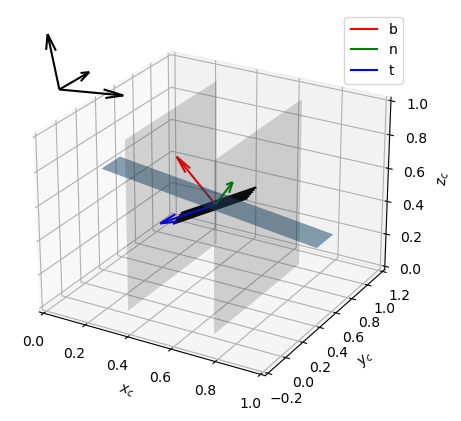

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (4,5))
ax = Axes3D(fig)


def init():
    

    # dislocation frame
    s = 0.3 # scale of the arrows
    
    ax.quiver( 0.5, 0.5, 0.5, lab_to_disloc[0,2]*s, lab_to_disloc[0,1]*s, lab_to_disloc[0,0]*s, color='r')
    ax.quiver( 0.5, 0.5, 0.5, lab_to_disloc[1,2]*s, lab_to_disloc[1,1]*s, lab_to_disloc[1,0]*s, color='g')
    ax.quiver( 0.5, 0.5, 0.5, lab_to_disloc[2,2]*s, lab_to_disloc[2,1]*s, lab_to_disloc[2,0]*s, color='b')
    plt.legend(['b', 'n', 't'])

    ax.quiver( 0., 0., 1.2, ref_to_lab[0,2]*s, ref_to_lab[0,1]*s, ref_to_lab[0,0]*s, color='k')
    ax.quiver( 0., 0., 1.2, ref_to_lab[1,2]*s, ref_to_lab[1,1]*s, ref_to_lab[1,0]*s, color='k')
    ax.quiver( 0., 0., 1.2, ref_to_lab[2,2]*s, ref_to_lab[2,1]*s, ref_to_lab[2,0]*s, color='k')


    # Crystal surfaces
    xx = np.linspace(0, 1, 2)
    yy = np.linspace(0, 1, 2)
    xx, yy = np.meshgrid(xx,yy, indexing ='ij')

    ax.plot_surface(0.3*np.ones(xx.shape), yy, xx, alpha=0.2, color = [0.5, 0.5, 0.5])
    ax.plot_surface(0.7*np.ones(xx.shape), yy, xx, alpha=0.2, color = [0.5, 0.5, 0.5])


    zz = np.linspace(0, 1, 2)
    yy = np.linspace(0.4, 0.6, 2)
    zz, yy = np.meshgrid(xx,yy, indexing ='ij')
    ax.plot_surface(zz, yy, -np.tan(theta)*zz+0.6 , alpha=0.5)


    # Dislocation lines
    for number in range(-3, 3):
        
        s = 0.4
        pos = np.array((0.5, 0.5, 0.5)) + number*0.03*lab_to_disloc[1,:] - s/2*lab_to_disloc[2,:]
        
        #ax.quiver( *np.flip(pos), lab_to_disloc[2,2], lab_to_disloc[2,1], lab_to_disloc[2,0], color='k')
        
        start = np.flip(pos); end = np.flip(pos + s*lab_to_disloc[2,:])
        
        plt.plot(*( (start[ii], end[ii]) for ii in range(3) ) ,color = 'k')



    ax.set_xlabel('$x_c$')
    ax.set_ylabel('$y_c$')
    ax.set_zlabel('$z_c$')

    ax.set_xlim3d((0,1))
    ax.set_ylim3d((-0.2,1.2)) # This is a BAD hack to make the axes appear orthonormal. 3D plotting in pyplot is  an unmitigated disaster ATM, because they decided to un-implement axis='equal', which did some thing wrong, but was WAAAAAAY better that what they have now instead.
    ax.set_zlim3d((0,1))
 
    return [fig]
    
# def animate(i):
#     ax.view_init(elev=10., azim=i)
#     return [fig]
    

# # Animate
# anim = FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
# # Save
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])



init()

def animate(i):
    ax.view_init(elev=25., azim=i)
    return [fig]
animate(300)

plt.savefig('geom_view_Jun20.svg')

plt.show()


In [4]:
### Write values to a parameter file
import sys, os
sys.path.insert(0, '../')
import dfxm_fwrd_sim.parameter_parser as par
root_dir = '../al_4.0_mu_0.25_cutoff_RMS-E/'
par_fn = 'al_4_0.25.ini'
params = par.init_parameter_dictionary(root_dir + par_fn)
params['I/O']['root_dir'] = root_dir

# Parameter parser only takes vectors
params['Material']['a'] = UA_sim[:,0]
params['Material']['b'] = UA_sim[:,1]
params['Material']['c'] = UA_sim[:,2]

######## Geometry of integration ######
params['Geometry']['grid_shape'] = [1024, 512, 1001]
params['Geometry']['step_sizes'] = [40e-6, 40e-6, 100e-6]
params['Geometry']['hkl'] = hkl
params['Geometry']['Q'] = Q

# Make energy axis
sig_E_rel = 1.41e-4 / 2.35
n_E = 11
relative_energy_list = np.linspace(-3*sig_E_rel, 3*sig_E_rel, n_E)
rel_weight = np.exp(-relative_energy_list**2/2/sig_E_rel**2)
abs_weight = rel_weight / np.sum(rel_weight)


params['Beam'] = {'lmbd_ref':lmbd, 'k_0_ref':k_0_ref, 'N_modes':len(relative_energy_list)}


# Loop over modes and create a new field for each one with a length corresponging to the realtive energy and 
for ii, rel_energ in enumerate(relative_energy_list):
    Q_norm = Q/np.linalg.norm(Q)
    inplane_normal = k_0_ref - np.dot(k_0_ref, Q)/np.linalg.norm(Q)**2*Q
    inplane_normal = inplane_normal / np.linalg.norm(inplane_normal)
    theta_ii = np.arcsin(lmbd/(rel_energ+1)/4/np.pi*np.linalg.norm(Q))
    k_0 = (np.cos(theta_ii)* inplane_normal - np.sin(theta_ii)* Q_norm)*2*np.pi/lmbd*(rel_energ+1)

    params[f'Mode {ii:d}'] = {'number':ii, 'k_0':k_0, 'lmbd':lmbd/(1+rel_energ), 'weigth':abs_weight[ii]}

####### Save it to human (and machine) readable file ##########
par.par_write(params)


1

Text(0, 0.5, 'Relative Weight')

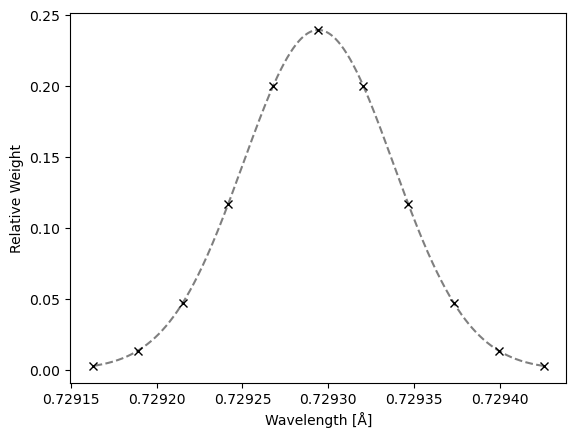

In [5]:
fig, ax = plt.subplots()
ee = np.linspace(relative_energy_list[0], relative_energy_list[-1], 1000)
ww = np.exp(-ee**2/2/sig_E_rel**2)
ww *= np.max(abs_weight)/np.max(ww)
ax.plot(lmbd/(1+ee)*10**(10-3), ww,'--', color = [0,0,0,0.5])
ax.plot(lmbd/(1+relative_energy_list)*10**(10-3), abs_weight, 'x', color = [0,0,0])
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Relative Weight')

## Define incident beam

I'm just using my "normal" ID06 beam.

4e-05


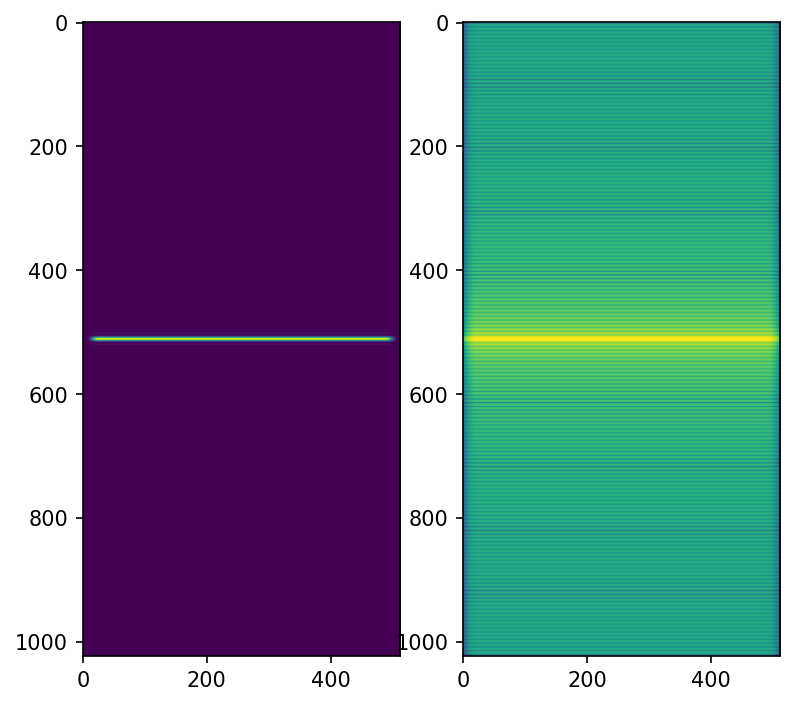

In [6]:
## Do a quick simulation of a beam by specifying the aperture of an up-stream 1D lens:
from scipy.special import erf
import os
import pickle

print(params['Geometry']['step_sizes'][0])

# Geometry
condenser_distance = 1000
# Aperture
gauss_sig_param = 2/np.sqrt(50)
cutoff_distance = 0.15 # beam height

# coord array in condenser plane
x_sample = np.arange(params['Geometry']['grid_shape'][0]) * params['Geometry']['step_sizes'][0]
x_cond = np.fft.fftshift(np.fft.fftfreq(params['Geometry']['grid_shape'][0])/ params['Geometry']['step_sizes'][0]) * params['Beam']['lmbd_ref'] * condenser_distance
Apert = np.exp(-(x_cond)**2/2/gauss_sig_param**2)
# # Add some spherical aberration for fun
# A = A * np.exp(1j*(x_cond*6)**4)
Apert[np.abs(x_cond)>cutoff_distance] = 0

E_0_norm = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Apert)))

y_sample = np.arange(params['Geometry']['grid_shape'][1]) * params['Geometry']['step_sizes'][1]

y_width = 19.5*1e-3
y_mid = np.mean(y_sample)
y_smooth_param = 0.3*1e-3
y_profile = 1-erf((np.abs(y_sample-y_mid)-y_width/2)/y_smooth_param)

E_0_indcident = E_0_norm[:,np.newaxis]*y_profile[np.newaxis, :]

fig, axes = plt.subplots(1,2, figsize = (6,6), dpi = 150)
axes[0].imshow(np.abs(E_0_indcident)**2)
axes[1].imshow(np.log(np.abs(E_0_indcident)**2))


# Save beam


beam_name = 'incident_1'

if not os.path.isdir(root_dir + 'incident_field'):
    os.makedirs(root_dir + 'incident_field')

with open(root_dir + 'incident_field/' + beam_name + '.npy', 'wb+') as fid:
    pickle.dump(E_0_indcident, fid)


## Specify optical parameters

Look up scattering constants for alimunium as a function of energy

In [7]:
############### CALCULATE MATERIAL OPTICAL PROPERTIES ####################

cif_file= params['I/O']['root_dir'] + '/9012955.cif'
''' get scatter function based on dan's diffraction
    Dan's diffraction reads cif files and is used to calculate correct atomic positions for scattering
    Dan's diffraction does not include a function for anomalous scattering, but this has been made based on xrddb and is assigned separately
'''

import Dans_Diffraction
import dfxm_fwrd_sim.structure_factor



for ii in range(params['Beam']['N_modes']):
    print(params[f'Mode {ii:d}']['lmbd'])
    xtl = dfxm_fwrd_sim.structure_factor.setup_dans_diffraction(cif_file, float(params[f'Mode {ii:d}']['lmbd'])*1000 ) # this one runs in microns still
    chi_h = xtl.Scatter.x_ray_anomalous(params['Geometry']['hkl'] )[0]
    chi_hoverline = xtl.Scatter.x_ray_anomalous(-params['Geometry']['hkl'] )[0]

    print(chi_h)
    prod = np.sqrt(chi_h*chi_hoverline)
    print(prod)

    # see https://journals.iucr.org/q/issues/1949/02/00/a00117/a00117.pdf equation 8 and 9

    params[f'Mode {ii:d}']['chi_h_Re'] = np.real(prod)*np.cos(20*np.pi/180)
    params[f'Mode {ii:d}']['chi_h_Im'] = np.imag(prod)*np.cos(20*np.pi/180)
    params[f'Mode {ii:d}']['chi_0_Re'] = 3.2e-6  ### !!!!!!! LOOK THESE VALUES UP SOMWHERE DONT BE LAZY MADS
    params[f'Mode {ii:d}']['chi_0_Im'] = 9.0e-10
    params[f'Mode {ii:d}']['incident_field'] = root_dir + 'incident_field/' + beam_name + '.npy'

par.par_write(params)

7.294254142216185e-08
Scatter(9012955 with 1 atomic positions, 192 symmetries)
       Type: xray
     Energy: 16.99751557708051 keV
 Wavelength: 0.7294267704389551 A
 ---Settings---
      Powder units: tth
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -180.0
         max theta: 180.0
      min twotheta: -180.0
      max twotheta: 180.0
 ---X-Ray Settings---
 Waasmaier scattering factor: False
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: True
         Polarised: False
      Polarisation: sp
       Pol. vector: (0,1,0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1,0,0)
               flm: (0,1,0)
  use e1e1 approx.: True

(2.6077779667537324e-06+1.5859584392206682e-08j)
(2.6077779667537324e-06+1.5859584392206845e-08j)
7.293991511248207e-08
Scatter(9012955 with 1 atomic positions, 192 symmetries)
       Type: xray
     Energy: 

1

## Define sample

I make a function fascerated as an array as a sub-class of the already implemented ones. I might add this to the standard package in the future, but ATM it's not well tested.

In [8]:
class ScatteringFunction:
    """ Object-oriented version of the sample, which does not save a large array, but calculated the scattering function when needed.
    This is the parent class. It's just a perfect crystal
    """

    def __init__(self, params):
        """ Load the sample and scatting geometry and calculate the coordinate arrays
        """
        self.shape = np.array(params['Geometry']['grid_shape'])
        self.del_x = np.array(params['Geometry']['step_sizes'])

        self.Q = params['Geometry']['hkl'] # Q in hkl-basis

        # Crystal basis in lab frame in physical units
        self.A = np.stack((params['Material']['a'], params['Material']['b'], params['Material']['c'])).transpose()
        self.B =   2*np.pi * np.linalg.inv(self.A).transpose() # Recip lattice basis in lab frame physical units
        self.Q_phys =np.dot(self.B, self.Q) # Q lab frame phys. units

        # Coordinate_arrays. Sample space.
        x = np.arange(self.shape[0])*self.del_x[0]
        y = np.arange(self.shape[1])*self.del_x[1]

        self.x = x[:, np.newaxis]*np.ones(self.shape[:-1]) ## Hacky way to make a 1D matrix that behaves as a 2D matrix
        self.y = y[np.newaxis, :]*np.ones(self.shape[:-1])

        self.has_displacenemt_field_quenstionmark = False


    def __getitem__(self, key):
        """
        VERY hacky indexing. I assume that the frst two indexes are ':', and that the last is an integer aka.: key = (slice(None), slice(None), z_index)
        """


        if self.has_displacenemt_field_quenstionmark:
            zi = key[-1] #YOLO
            z = zi*self.del_x[2]*np.ones(self.shape[:-1]) # lab frame 'z' coord
            r = np.stack((self.x, self.y, z), axis = -1) # lab frame coord vectors with insane indexing convention
            u_array = self.u(r)
        else:
            u_array = np.zeros((*self.x.shape,3))

        return np.dot(u_array,self.Q_phys) / np.linalg.norm(self.Q_phys)

class EdgeDislocationWall(ScatteringFunction):
    def __init__(self, params, cen, U_disloc, bnorm, disloc_spacing, disloc_number, pois = 0.334):
        """
            INPUTS: 
                params: geometric information
                cen: position of central disloc in relative units
                U_disloc: rotation matric going from sim. frame to disloc. relative frame
                bnorm: magnitude of Burger's vector in mm
                disloc_spacing: nearest distance from disloc to neighbor in mm
                disloc_number: number of dislocs. I havent written expections for single disloc yet, but I should
                pois: poisson ratio              
        """
        super().__init__(params)
        
        # Store inputs
        self.Rot = U_disloc
        self.Rot_inv = np.linalg.inv(self.Rot) # Is this the same as the transpose?
        self.has_displacenemt_field_quenstionmark = True
        self.disloc_N = disloc_number
        self.pois = pois
        self.bnorm = bnorm

        # Build list of relative positions of dislocation cores:
        self.distance_along_n = np.linspace( -(disloc_number-1) / 2*disloc_spacing, (disloc_number-1) / 2*disloc_spacing, disloc_number)
        # distance_along_b = np.zeros(disloc_number)
        

        # Center is in relative coordinates for some dumb reason
        centre_pos = self.shape*self.del_x*np.array(cen)
        self.rotation_center = centre_pos[np.newaxis, np.newaxis, :]

    def u(self, r):

        # plt.imshow(r[:,:,0], aspect = 1/10)
        # plt.colorbar()
        # plt.show()
        
        # plt.imshow(r[:,:,1], aspect = 1/10)
        # plt.colorbar()
        # plt.show()
        
        # plt.imshow(r[:,:,2], aspect = 1/10)
        # plt.colorbar()
        # plt.show()
        

        # Get coorinates in dislocation frame
        r = r-self.rotation_center
        r = np.dot(r, self.Rot)
        # plt.imshow(r[:,:,0], aspect = 1/10)
        # plt.colorbar()
        # plt.show()
        
        # plt.imshow(r[:,:,1], aspect = 1/10)
        # plt.colorbar()
        # plt.show()
        
        # plt.imshow(r[:,:,2], aspect = 1/10)
        # plt.colorbar()
        # plt.show()


        # to avoid div by 0 error
        alpha = 1e-26

        # Initialize
        un = np.zeros(r.shape[:-1])
        ut = np.zeros(r.shape[:-1])
        ub = np.zeros(r.shape[:-1])

        # loop through dislocations
        for ii in range(self.disloc_N):

            r_local = np.copy(r)
            r_local[...,1] = r_local[...,1] - self.distance_along_n[ii]
            '''    
            un += self.bnorm/np.pi/2 * ((1-2*self.pois)/4/(1-self.pois)*np.log(r_local[...,0]**2 + r_local[...,1]**2 + alpha) \
                                                + (r_local[...,0]**2 - r_local[...,1]**2) / (2*(1-self.pois)*(r_local[...,0]**2 - r_local[...,1]**2 + alpha)))
            ub += self.bnorm/np.pi/2 * (np.arctan2(r_local[...,1], r_local[...,0]) \
                                                + r_local[...,0] * r_local[...,1] / (2*(1-self.pois)*(r_local[...,0]**2 + r_local[...,1]**2 + alpha)) )
            '''
            un += -self.bnorm/2/np.pi * ( (1-2*self.pois)/4/(1-self.pois)*np.log(r_local[...,0]**2 + r_local[...,1]**2 + alpha) \
                                   +     (r_local[...,0]**2 - r_local[...,1]**2) / (4*(1-self.pois)*(r_local[...,0]**2 + r_local[...,1]**2 + alpha)))
            ub += self.bnorm/2/np.pi * (np.arctan2(r_local[...,1], r_local[...,0])  + \
                                  r_local[...,0] * r_local[...,1] / (   2*(1-self.pois)*(r_local[...,0]**2 + r_local[...,1]**2 + alpha))   )

        # stack
        u = np.stack((ub,un,ut), axis = -1)
        out = np.dot(u, self.Rot_inv)
        return out

In [9]:

R_disloc_sim = (U_sim @ disloc_to_latt).T
R_disloc_sim = (U_sim @ disloc_to_latt)

Q = params[f'Geometry']['Q']
b = np.dot(A, np.array([0.5, -0.5, 0]) )
bnorm = np.linalg.norm(b)

L = params['Geometry']['step_sizes'][2] * params['Geometry']['grid_shape'][2]
Lx = params['Geometry']['step_sizes'][0] * params['Geometry']['grid_shape'][0]
Ly = params['Geometry']['step_sizes'][1] * params['Geometry']['grid_shape'][1]
mid_x = 0.5 - np.tan(theta)*0.5*L/Lx


mid = [mid_x, 0.5, 0.5]
dist_between_dislocs = 0.004
number_of_disloc = 31

displacement_field = EdgeDislocationWall(params, mid, R_disloc_sim, bnorm, dist_between_dislocs, number_of_disloc)


In [10]:
from tqdm import tqdm
df = np.zeros(params['Geometry']['grid_shape'])
for i in tqdm(range(df.shape[2])):
    df[:,:,i] = displacement_field[:,:,i]
displacement_field = df

100%|██████████| 1001/1001 [28:52<00:00,  1.73s/it]


In [11]:
# Save displacement field
disp_field_name = f'{round(dist_between_dislocs*1e3):d}_distance_{number_of_disloc:d}_number'
with open(root_dir + disp_field_name + '.npy', 'wb') as fid:
    pickle.dump(displacement_field, fid)

# Update ini file
params['I/O']['displacement_field'] = root_dir + disp_field_name + '.npy'
par.par_write(params)


1

In [12]:
# Load displacement field
disp_field_name = f'{round(dist_between_dislocs*1e3):d}_distance_{number_of_disloc:d}_number'
file_path = root_dir + disp_field_name + '.npy'

with open(file_path, 'rb') as fid:
    displacement_field = pickle.load(fid)

# Update ini file
params['I/O']['displacement_field'] = root_dir + disp_field_name + '.npy'
par.par_write(params)

1

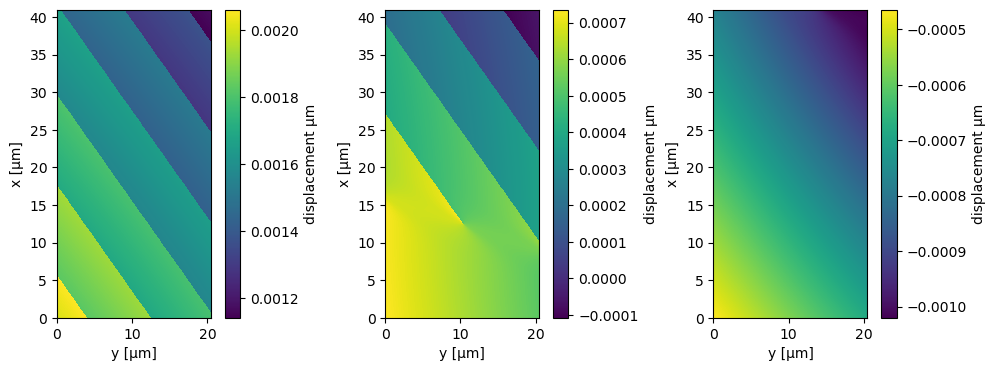

In [12]:
df = displacement_field
fig, axes = plt.subplots(1,3,figsize=(12, 4), dpi=100)
for i, j in enumerate([0, df.shape[2]//2, df.shape[2]-1]):#,ex.shape[2]-1]):
    ax = axes[i]
    #cbar = ax.imshow(np.angle(np.exp(1j*Q_shift)[:,:,j]),extent=[0, ex.del_x[1]*ex.shape[1], ex.del_x[0]*ex.shape[0],0], interpolation = 'nearest', cmap='twilight')
    cbar = ax.imshow(displacement_field[:,:,j]*1000, extent=[0, 1000*params['Geometry']['grid_shape'][1]*params['Geometry']['step_sizes'][1],
                                                        1000*params['Geometry']['grid_shape'][0]*params['Geometry']['step_sizes'][0],0], interpolation = 'nearest')
    ax.invert_yaxis()
    cb = fig.colorbar(cbar, ax= ax)
    cb.set_label('displacement µm')
    ax.set_xlabel('y [μm]')
    ax.set_ylabel('x [μm]')

-2.356194490192345 0.7853981633974483 (-1-1j)


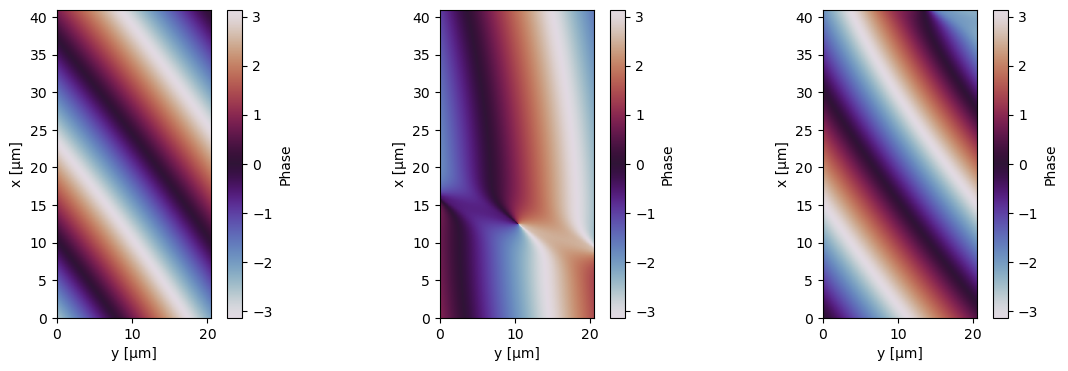

In [13]:

fig, axes = plt.subplots(1,3,figsize=(14, 4), dpi=100)
for i, j in enumerate([0, df.shape[2]//2, df.shape[2]-1]):#,ex.shape[2]-1]):
    ax = axes[i]
    Q_shift = np.angle(np.exp(1j*displacement_field[:,:,j]*np.linalg.norm(Q)))
    cbar = ax.imshow(Q_shift, extent=[0, 1000*params['Geometry']['grid_shape'][1]*params['Geometry']['step_sizes'][1],
                    1000*params['Geometry']['grid_shape'][0]*params['Geometry']['step_sizes'][0],0], interpolation = 'nearest', cmap='twilight',
                    vmin = -np.pi, vmax = np.pi)
    ax.invert_yaxis()
    cb = fig.colorbar(cbar, ax= ax)
    cb.set_label('Phase')
    ax.set_xlabel('y [μm]')
    ax.set_ylabel('x [μm]')
print(np.angle(-1-1j),np.angle(+1+1j), -1-1j)

## Imaging system

Define a lens-object and an imaging geometry

{'Material': 'Be', 'lmbd': 7.292941176470587e-08, 'beta': 2.3868540754294943e-10, 'delta': 1.1795121472119406e-06}
2theta = 17.95333341242662 degrees
optical path = 5022.558991366114 mm


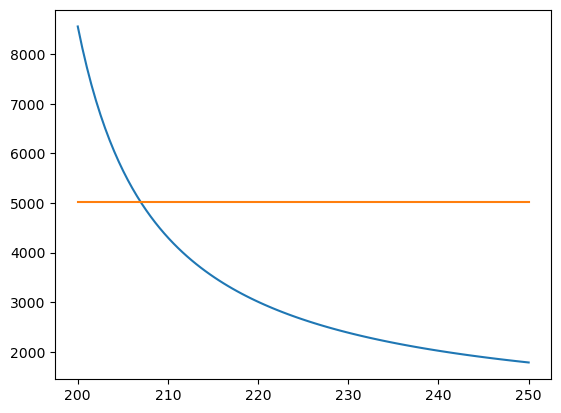

M = 16.84816383916073


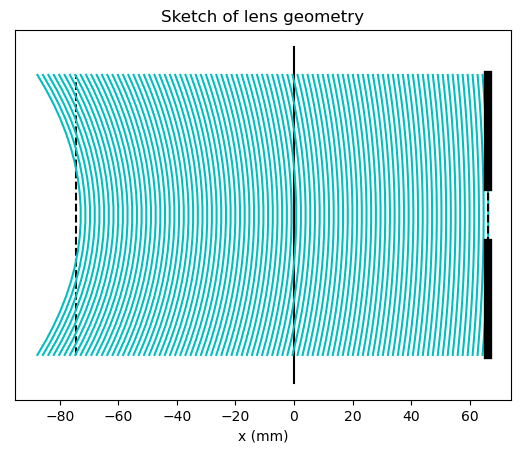

16.84816383916073
206.970716490532


In [14]:
import dfxm_fwrd_sim.CRL_sim as CRL
# Calculate individual lenslet parameters:
R = 0.05 #mm
central_wavelength_mm = params['Beam']['lmbd_ref'] # mm
material = 'Be'

# Pack parameters into a dictionary
params['Optics'] = {'Material':material, 'lmbd':central_wavelength_mm}

# Look up optical constants
CRL.NIST_Reader( params['Optics'], datafile_directory = '../attenuation_datafiles/')

# Calculate individual lenslet parameters
f = R / 2 / params['Optics']['delta'] 
sig_a = 1 / 2 * np.sqrt( R*params['Optics']['lmbd']/np.pi/params['Optics']['beta']) 

print(params['Optics'])

# Define a simple lens
lens_description = []
#lens_description.append({'kind':'aberration_function', 'function':aber_1})
lens_description.append({'kind':'lens box', 'N':88, 'f':f, 'T':1.600, 'sig_a':sig_a})
#lens_description.append({'kind':'aberration_function', 'function':aber_2})
lens_description.append({'kind':'square aperture', 'width':0.1}) 


# Find focus condition
print(f'2theta = {2*theta*180/np.pi} degrees')
tot_dist = 4778/np.cos(2*theta)
print(f'optical path = {tot_dist} mm')
a = 200;b= 250

# Focus plot to test ranges
d1_list = np.linspace(a,b,100)
d2_list = [CRL.find_focal_distance(d1, lens_description)[0] for d1 in d1_list]
plt.plot(d1_list, d1_list+d2_list)
plt.plot([d1_list[0], d1_list[-1]], [tot_dist]*2)
plt.show()

# Calculate focus position
d1_fl = CRL.determine_focus_condition(tot_dist, lens_description, a, b)
d2_fl, a_fl = CRL.find_focal_distance(d1_fl, lens_description)
M = d2_fl/d1_fl/a_fl
params['Optics']['M'] = M
d1_eff = tot_dist/(np.abs(M)+1)

# Shift origin in lens description to eff. thin lens pos.
lens_description_eff = list(lens_description)
lens_description_eff.insert(0, {'kind':'free space', 'length':(d1_fl - d1_eff)})
params['Optics']['d1'] = d1_eff

print(f'M = {M}')

CRL.draw_lens(d1_fl, lens_description_eff)


# Save objective lens
obj_lens_name = 'perf_CRL'
with open(root_dir + obj_lens_name + '.npy', 'wb+') as fid:
    pickle.dump(lens_description_eff, fid)

# Update ini file
params['I/O']['obj_lens'] = root_dir + obj_lens_name + '.npy'
par.par_write(params)
print(M)
print(d1_fl)

In [19]:
print(d1_fl,d2_fl)
print(M)

206.970716490532 4815.588274875489
16.84816383916073


# Spoof integrator so you don't need to install it in the environment

In [15]:
import tqdm
class fakemodule(object):
    @staticmethod
    def laue_exponential_heun_vertical(E_init, u, stepsizes, gridshape, lmbd, alpha_0, alpha_h, chi_0, chi_h, chi_hm = None, C = 1, phi = 0, u_type = 'array'):

        ''' Strained crystal finite difference integrator in the Laue case for a fixed rocking angle and crystal thickness.
        The finite difference is "exponential euler" descibed in https://arxiv.org/abs/2106.12412
        Parameters:
            E_init (N_x by N_y complex numpy array): Complex real space amplitude of the incident beam.
            u (various optics): specifies how the displacement field is given. The displacement fiels given should always
                only be the component parallel to Q
                If u_type is 'array' u should be an numpy array of dimension "gridshape" with realf float elements

            stepsizes (3 length sequence of floats): The step sizes in x, y, and z directions.
            gridshape (3 length sequence of ints): Number of steps in the integration grid Nx, Ny, Nz. The total thickness of 
            the crystal is L_z = stepsizes[2]*(gridshape[2]-1)
            lmbd (float): wavelength in same units as u and stepsizes
            k_0 (3 length float numpy array): Wavevector of incident beam.
            k_h (3 length float numpy array): Wavevector of scattered beam. K_0 and k_h should *exactly* sattisgy the vacuum Bragg condition
            chi_0 (complex float): average electric susceptibility
            chi_h (complex float): fourier coeff. of the electric susceptibility corresponding to the reflection
            chi_hm (optional, complex float): fourier coeff. of the electric susceptibility corresponding to the back-reflection
            C (optional, float): Polarization factor
            phi (optional, float): rocking angle
            u_type (string): tells the program how the displacement field is specified
        Returns:
            E_0 (N_x by N_y complex numpy array): Complex real space amplitudes of transmitted beam.
            E_h (N_x by N_y complex numpy array): Complex real space amplitudes of scattered beam.
        '''

        # If chi_hm is not explicitly given, we assume that the chi_h given correcponds to a central reflection
        # and that the imaginary part is the absorption related annommalous part:
        if chi_hm is None:
            chi_hm = chi_h


        # Build frequency arrays
        qx = np.fft.fftfreq(gridshape[0])/stepsizes[0]
        qx = qx[:, np.newaxis]*np.ones(gridshape[:2])

        # Reciprocal space geometry. Uglier than it needs to be, but better than rewriting everything
        k = 2*np.pi / lmbd
        twotheta = np.abs(alpha_h-alpha_0)
        beta = 2*np.sin(twotheta)*phi
        Q = 2*k*np.sin(twotheta/2)

        # Precalculate some trig. for prettier code later
        ct0 = np.cos(alpha_0)
        cth = np.cos(alpha_h)
        tt0 = np.tan(alpha_0)
        tth = np.tan(alpha_h)
        st0 = np.sin(alpha_0)
        sth = np.sin(alpha_h)

        # transform initial condition
        E0_f = np.fft.fft(E_init, axis = 0)

        # Build coefficient arrays (equations are derived in paper)
        #A0 = -1j / 2 / (ct0 * k + tt0 * q_parallel0) * (k**2*chi0 + 4 * np.pi * st0 * q_parallel0 * k + q_normal0**2 + (1-tt0**2) * q_parallel0**2)
        #Ah = -1j / 2 / (cth * k + tth * q_parallelh) * (k**2*chi0 + 4 * np.pi * sth * q_parallelh * k + q_normalh**2 + (1-tth**2) * q_parallelh**2)
        A0 = -1j/2/ct0 * (k*(chi_0) + 4 * np.pi*st0*qx )
        Ah = -1j/2/cth * (k*(chi_0+beta) + 4 * np.pi*sth*qx )
        A = np.stack((A0, Ah), axis = 2)
        A = A.flatten()

        #B0 = -1j * k**2 / 2 / (ct0 * k + tt0 * 2* np.pi * q_parallel0)
        #Bh = -1j * k**2 / 2 / (cth * k + tth * 2* np.pi * q_parallelh)
        B0 = -1j * k / 2 / ct0 *np.ones(A0.shape)
        Bh = -1j * k / 2 / cth *np.ones(A0.shape)
        B = np.stack((B0, Bh), axis = 2)
        B = B.flatten()

        # Define sub function
        def B_fun(E, chih_slice, chihm_slice):

            # Perform fourier convolution
            arr = np.fft.ifft(E.reshape((*gridshape[:2], 2)), axis = 0)
            arr = arr * np.stack((chih_slice, chihm_slice), axis = -1)
            arr = np.fft.fft(arr, axis = 0)

            # Switch E_0 and E_h parts
            arr = np.flip(arr, axis=2)

            # Multiply by coefficient arrays
            arr[:,:,0] = B0 * arr[:,:,0]
            arr[:,:,1] = Bh * arr[:,:,1]

            # return flattened array
            return arr.flatten()

        # Pre-calculate exponentials

        h = stepsizes[2]
        phi0 = np.exp(h*A)
        phi1 = np.nan_to_num(1/h/A * (phi0 - 1))
        phi2 = np.nan_to_num(2/h/A * (phi1 - 1))

        # Prepare initial condition

        E_running = np.zeros((*gridshape[:2], 2), dtype=complex)
        E_running[..., 0] = E_init
        E_running = np.fft.fft(E_running, axis= 0).flatten()


        iz = 0
        if u_type == 'array':
            u_iz = u[:,:,iz]

            # Multiply by susceptibilities
            chih_slice = chi_h*np.exp(1j*u_iz*Q )
            chihm_slice = chi_hm*np.exp(-1j*u_iz*Q )


        ############           INTEGRATION     ##################
        for iz in tqdm.tqdm(range(gridshape[2]-1)): # loop over z slices

            # if iz%1 == 0:
            #     print(iz)

            # Do the first part of the finite difference step
            E1 = np.array(E_running)
            g1 = B_fun(E1, chih_slice, chihm_slice)        
            E2 = phi0*E1 + h * phi1 * g1

            # Read/calculate the next slice in the u function
            u_iz = u[:,:,iz+1]
            chih_slice = chi_h*np.exp(1j*u_iz*Q )
            chihm_slice = chi_hm*np.exp(-1j*u_iz*Q )

            # Do the second part of the finite difference step
            g2 = B_fun(E2, chih_slice, chihm_slice)
            E_running = phi0*E1 + h/2 * ((2*phi1-phi2)*g1 + phi2*g2)

        # Transform output back
        Eh_out = np.fft.ifft(E_running.reshape((*gridshape[:2], 2)), axis = 0)[:,:,1]
        E0_out = np.fft.ifft(E_running.reshape((*gridshape[:2], 2)), axis = 0)[:,:,0]

        return E0_out, Eh_out

import sys
sys.modules["dynamical_diffraction.strained_crystal_3d"] = fakemodule

## Run integrations

In [16]:
# test integrator
import dfxm_fwrd_sim.parameter_parser as par
import dfxm_fwrd_sim.integrate as integrate
#integrate.integrate_mode_n(1, par_fn, 1)

In [17]:
from dfxm_fwrd_sim import integrate

In [18]:
paramsparams = par.par_read(root_dir + par_fn)
params['Status']['processes'] = 4
par.par_write(params) 

1

In [19]:
params['Beam']

{'lmbd_ref': 7.292941176470587e-08,
 'k_0_ref': array([-13442853.1367722 ,         0.        ,  85099118.26514898]),
 'N_modes': 11}

In [24]:
import multiprocessing

num_processes = multiprocessing.cpu_count()
print("Number of available processes:", num_processes)

Number of available processes: 24


In [20]:
# run in parallel
params = par.par_read(root_dir + par_fn)
params['Status']['processes'] = 12
par.par_write(params) 
if 1:
    for phi in [0, 100, 200, 300]:
        phi = phi*1e-6
        integrate.integrate_parallel(par_fn, phi)

-06 1.66783253e-06 1.66823219e-06 ... 1.17013610e-06
  1.17053562e-06 1.17093513e-06]
 [1.66775868e-06 1.66815827e-06 1.66855787e-06 ... 1.17042904e-06
  1.17082849e-06 1.17122793e-06]
 [1.66808442e-06 1.66848395e-06 1.66888349e-06 ... 1.17072193e-06
  1.17112131e-06 1.17152068e-06]]   <class 'numpy.ndarray'>(1024, 512)(1024, 512) <class 'numpy.ndarray'> 
<class 'numpy.ndarray'>

[[2.00851748e-06 2.00901252e-06 2.00950752e-06 ... 1.78857792e-06
  1.78905538e-06 1.78953280e-06]
 [2.00888766e-06 2.00938253e-06 2.00987736e-06 ... 1.78888619e-06
  1.78936355e-06 1.78984088e-06]
 [2.00925786e-06 2.00975257e-06 2.01024724e-06 ... 1.78919452e-06
  1.78967180e-06 1.79014903e-06]
 ...
 [1.66743288e-06 1.66783253e-06 1.66823219e-06 ... 1.17013610e-06
  1.17053562e-06 1.17093513e-06]
 [1.66775868e-06 1.66815827e-06 1.66855787e-06 ... 1.17042904e-06
  1.17082849e-06 1.17122793e-06]
 [1.66808442e-06 1.66848395e-06 1.66888349e-06 ... 1.17072193e-06
  1.17112131e-06 1.17152068e-06]] (1024, 512) <clas

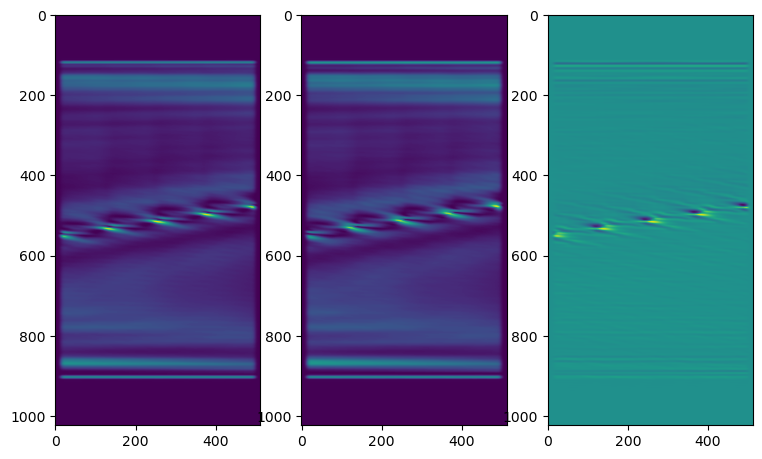

In [21]:
# check exit field
fig, axes = plt.subplots(1,3, figsize = (9,6), dpi = 100)
E_fields = []

for i in range(11):
    with open(f'../al_4.0_mu_0.25_cutoff_RMS-E/integrated_field/phi_0000_murad/mode_{i:04d}.npy', 'rb') as fid:
        E_end = pickle.load(fid)
        E_fields.append(E_end)
axes[0].imshow(np.abs(E_fields[0])**2)
axes[1].imshow(np.abs(E_fields[10])**2)
axes[2].imshow(np.abs(E_fields[0])**2-np.abs(E_fields[10])**2)

In [22]:
import dfxm_fwrd_sim.propagate as prop

# Load parameters
params = par.par_read(root_dir +par_fn)
par.par_write(params) 
params['Optics']['FOV_cen'] = [params['Geometry']['grid_shape'][ii] * params['Geometry']['step_sizes'][ii]*0.5 for ii in (0,1) ]


# Choose rocking angle
for phi in [0, 100, 200, 300]:
    phi = phi*1e-6

    integration_name = f'phi_{phi*1e6:04.0f}_murad'
    propagation_name = 'lens_pos_1'

    # Rotate initial condition rel. to lens to simulate misalgninment
    rot_x = 0.0e-3
    rot_y = 0.0e-3

    # Call the propagation script

    for n in range(params['Beam']['N_modes']):
        prop.propagate(n, params, (rot_x, rot_y), integration_name, propagation_name)


{'kind': 'free space', 'length': -74.43408439694625}
{'kind': 'lens box', 'N': 88, 'f': 21195.203507732826, 'T': 1.6, 'sig_a': 1.1026012773017384}
100%|██████████| 88/88 [00:14<00:00,  6.01it/s]
{'kind': 'square aperture', 'width': 0.1}
{'kind': 'free space', 'length': -74.43408439694625}
{'kind': 'lens box', 'N': 88, 'f': 21195.203507732826, 'T': 1.6, 'sig_a': 1.1026012773017384}
100%|██████████| 88/88 [00:14<00:00,  6.23it/s]
{'kind': 'square aperture', 'width': 0.1}
{'kind': 'free space', 'length': -74.43408439694625}
{'kind': 'lens box', 'N': 88, 'f': 21195.203507732826, 'T': 1.6, 'sig_a': 1.1026012773017384}
100%|██████████| 88/88 [00:14<00:00,  6.20it/s]
{'kind': 'square aperture', 'width': 0.1}
{'kind': 'free space', 'length': -74.43408439694625}
{'kind': 'lens box', 'N': 88, 'f': 21195.203507732826, 'T': 1.6, 'sig_a': 1.1026012773017384}
100%|██████████| 88/88 [00:14<00:00,  6.22it/s]
{'kind': 'square aperture', 'width': 0.1}
{'kind': 'free space', 'length': -74.43408439694625}